<center><h1>COMP551
<center>Assignment 1

## Adult data set:

### Preprocessing:

We are given data about adults as follows:

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('./data/adult.data',
                names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "above-50k"],
                skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above-50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We need to clean and encode this data to use it in our experiments.
The data contains categorical data that is of unknown value `'?'`. We need to find instances that contain that value.

In [3]:
foldr = lambda func, acc, xs: reduce(lambda x, y: func(y, x), xs[::-1], acc)
log_or = lambda x, y: np.logical_or(df[x] == '?', y)
desc_names = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
x = foldr(log_or, np.full(df.shape[0], False), desc_names)
df.loc[np.where(x)[0]]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above-50k
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


 The code above finds all instances that contain at least one instance where a column value is `'?'`. We can see from the data that there are 2399 entries satisfying our condition.
 We need to take care of that by removing those instances from our data set.

In [4]:
df.drop(np.where(x)[0], inplace=True)
[df[x].unique() for x in desc_names]

[array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
        'Local-gov', 'Self-emp-inc', 'Without-pay'], dtype=object),
 array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
        '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object),
 array(['Never-married', 'Married-civ-spouse', 'Divorced',
        'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
        'Widowed'], dtype=object),
 array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
        'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
        'Craft-repair', 'Protective-serv', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
        'Other-relative'], dtype=object),
 array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo

Now we need to apply one-hot-encoding to all the categorical features name in `desc_names`.

In [5]:
df = pd.get_dummies(df, columns=desc_names, prefix=desc_names)

In [6]:
df = df.replace({"above-50k": {">50K": 1, "<=50K": 0}})
df.head(20)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,above-50k,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,16,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,14084,0,50,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,5178,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Cross-validation:

Using the K-NN and the decision tree algorithms provided in the scikit-learn package along with some code we can perform 5-fold cross validation.

In [7]:
import statistics
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def cross_validate(df, model=KNeighborsClassifier, model_params={"n_neighbors": 5}):
    folds = split(df)
    val_results = []
    trn_results = []
    for train, validate in folds:
        training, training_labels = train
        validation, validation_labels = validate
        mdl = model(**model_params)
        mdl = mdl.fit(training, training_labels)
        trn_results.append(mdl.score(training, training_labels))
        val_results.append(mdl.score(validation, validation_labels))
    return val_results, trn_results


def split(df):
    y = df['above-50k']
    X = df.drop('above-50k', axis=1)
    folds = []
    rows = X.shape[0]
    for fold in np.array_split(range(rows), 5):
        validate_data = X.loc[fold[0]: fold[-1]]
        validate_labels = y.loc[fold[0]: fold[-1]]
        train_data = X.drop(X.index[fold[0]: fold[-1]])
        train_labels = y.drop(y.index[fold[0]: fold[-1]])
        folds.append(((train_data, train_labels),
                      (validate_data, validate_labels)))
    return folds



The above code defines the cross-validation function. It splits the input data into 5-folds then performs 5-fold cross-validation using the the given model.

This runs the cross-validation using K-NN for different hyper-parameter values:

In [8]:
def knn_test(df, k_min=1, k_max=21, step=1):
    mean_list = []
    var_list = []
    t_mean_list = []
    t_var_list = []
    k_list = list(range(k_min,k_max,step))
    for k in k_list:
        val_results, trn_results = cross_validate(df, model_params={"n_neighbors":k})
        mean_list.append(statistics.mean(val_results))
        var_list.append(statistics.variance(val_results))
        t_mean_list.append(statistics.mean(trn_results))
        t_var_list.append(statistics.variance(trn_results))
    return mean_list, var_list, t_mean_list, t_var_list

In [14]:
def fit_curve_knn(mean_list, var_list, t_mean_list, t_var_list):
    fn = lambda x, a, b, c: a * np.log(b * x) + c
    fn_trn = lambda x,a,b,c: (1/(b * x + a)) + c
    x_vals = [i for i in range(1, (len(mean_list)* 5) + 1, 5)]
    y_vals = mean_list
    plt.plot(x_vals, y_vals, ".", label="validation data")
    plt.plot(x_vals, t_mean_list, '.', label="training data")
    opt_params, pcov = opt.curve_fit(fn, x_vals, y_vals)
    trn_optp, trn_pcov = opt.curve_fit(fn_trn, x_vals, t_mean_list)
    a, b, c = opt_params
    fit = [fn(x,a,b,c) for x in x_vals]
    a, b, c = opt_params
    trn_vals = np.linspace(1,max(x_vals),200)
    fit_trn = [fn_trn(x,a,b,c) for x in trn_vals]
    plt.plot(x_vals, fit, label="validation curve")
    #plt.plot(trn_vals, fit_trn, label="training curve")
    plt.xlabel('Value of K')
    plt.ylabel('Accuracy')
    plt.title("KNN Cross-validation")
    plt.legend()
    plt.show()

In [10]:
results = knn_test(df, 1, 100, 5)

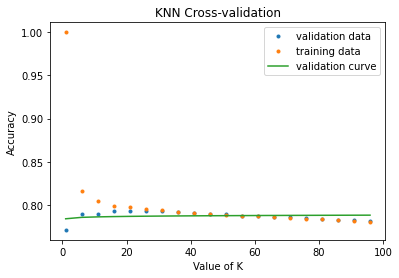

In [15]:
fit_curve_knn(*results)

In [17]:
val_means,_,_,_ = results
K, acc = max(zip(range(1,len(val_means) * 5 +1, 5),val_means), key=lambda item: item[1])
print("Maximum accuracy at K=" + str(K) +" equal to " + str(acc))

Maximum accuracy at K=21 equal to 0.7930879048583983


**Decision trees**:

Here we perform hyperparameter tuning using our cross-validation code and the Decision Tree model. 

In [23]:
def decision_tree_test(df, x_vals=[], param="max_depth", **kwargs):
    val_means = []
    trn_means = []
    for i in x_vals:
        kwargs.update({param: i})
        val_res, trn_res = cross_validate(df,
                                          model=DecisionTreeClassifier,
                                          model_params=kwargs)
        val_means.append(statistics.mean(val_res))
        trn_means.append(statistics.mean(trn_res))
    return val_means, trn_means

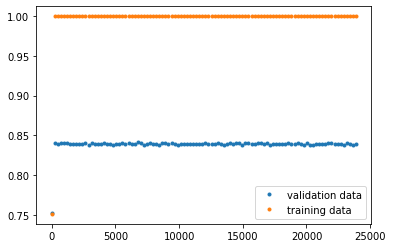

(6758, 0.8412783920767917)

In [30]:
from math import ceil
def max_depth_cut(df, k):
    depth_step = ((df.shape[0] * 0.8) - 1) / k
    depths = [min(ceil(depth_step * i) + 1, df.shape[0] - 1) for i in range(k)]
    val_means, trn_means = decision_tree_test(df, depths)
    plt.plot(depths, val_means, "." , label="validation data")
    plt.plot(depths, trn_means, "." , label="training data")
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    max_acc = max(zip(depths, val_means), key=lambda item: item[1])
    return max_acc


max_depth_cut(df, 100)

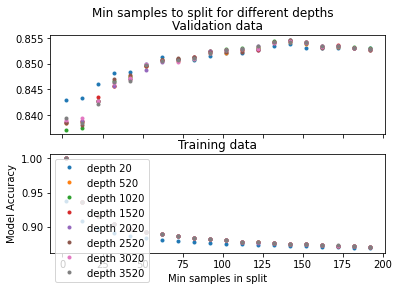

(2520, 142, 0.8546351257434235)

In [19]:
def depth_sample(df):
    x_vals = list(range(2, 202, 10))
    max_accuracy = (-1, -1, 0)
    fig, (ax1,ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Min samples to split for different depths')
    for i in range(20,4020,500):
        val_means, trn_means = decision_tree_test(df, x_vals, "min_samples_split", max_depth=i)
        ax1.plot(x_vals, val_means, ".", label=("depth "+str(i)))
        ax1.set_title("Validation data")
        ax2.plot(x_vals, trn_means, ".", label=("depth "+str(i)))
        ax2.set_title("Training data")
        plt.xlabel('Min samples in split')
        plt.ylabel('Model Accuracy')
        max_at_depth = max(zip(x_vals, val_means), key=lambda item: item[1])
        if max_at_depth[1] > max_accuracy[2]:
            max_accuracy = (i, *max_at_depth)
    plt.legend()
    plt.show()
    return max_accuracy

depth_sample(df)

In [31]:
from scipy.interpolate import UnivariateSpline
def growing_subsets(df, n=10, model=KNeighborsClassifier, **kwargs):
    frac = 1/n
    x_vals = []
    val_means = []
    trn_means = []
    for i in range(1,n+1):
        samp = df.sample(frac=float(i * frac))
        x_vals.append(samp.shape[0])
        samp = samp.reset_index(drop=True)
        # print(samp.shape[0])
        val_results, trn_results = cross_validate(samp, model=model, model_params=kwargs)
        val_means.append(statistics.mean(val_results))
        trn_means.append(statistics.mean(trn_results))
    plt.plot(x_vals, val_means, ".", label='Validation')
    plt.plot(x_vals, trn_means, ".", label='Training')
    val_spline = UnivariateSpline(x_vals, val_means, s=4)
    trn_spline = UnivariateSpline(x_vals, trn_means, s=4)
    xs = np.linspace(0, max(x_vals), 200)
    plt.plot(xs, val_spline(xs), label='Validation')
    plt.plot(xs, trn_spline(xs), label='Training')
    plt.xlabel('Size of subset')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    return val_means, trn_means

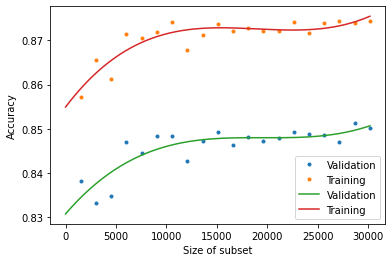

In [33]:
val_means, trn_means = growing_subsets(df, 20, model=DecisionTreeClassifier, max_depth=2520, min_samples_split=142)

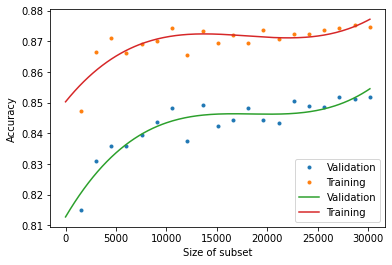

In [36]:
_, _ = growing_subsets(df, 20, model=DecisionTreeClassifier, max_depth=6758, min_samples_split=142)

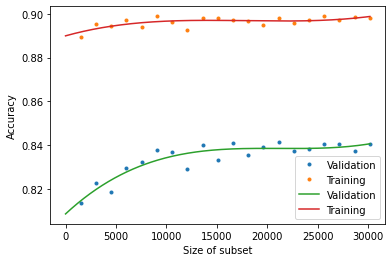

In [37]:
_, _ = growing_subsets(df, 20, model=DecisionTreeClassifier, max_depth=6758, min_samples_split=40)


In [40]:
val_means, trn_means = decision_tree_test(df, x_vals=np.linspace(0,0.1, 20), param="min_impurity_decrease", max_depth=6758, min_samples_split=40)
entr_vals, entr_trn = decision_tree_test(df, x_vals=np.linspace(0,0.1, 20), param="min_impurity_decrease", max_depth=6758, min_samples_split=40, criterion="entropy")

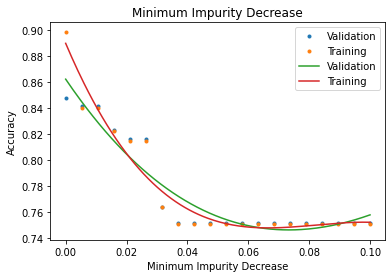

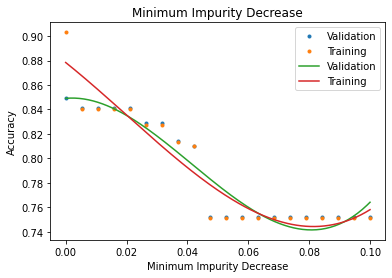

In [43]:
def plot_trn_val(x_vals, val, trn, x='x', y='y', title='title'):
    plt.plot(x_vals, val, ".", label='Validation')
    plt.plot(x_vals, trn, ".", label='Training')
    val_spline = UnivariateSpline(x_vals, val, s=1)
    trn_spline = UnivariateSpline(x_vals, trn, s=1)
    xs = np.linspace(0, max(x_vals), 200)
    plt.plot(xs, val_spline(xs), label='Validation')
    plt.plot(xs, trn_spline(xs), label='Training')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(x)
    plt.legend()
    plt.show()

plot_trn_val(np.linspace(0,0.1,20), val_means, trn_means, 'Minimum Impurity Decrease', 'Accuracy', 'Effect of minimum impurity decrease(GINI)')
plot_trn_val(np.linspace(0,0.1,20), entr_vals, entr_trn, 'Minimum Impurity Decrease', 'Accuracy', 'Effect of minimum impurity decrease(Entropy)')

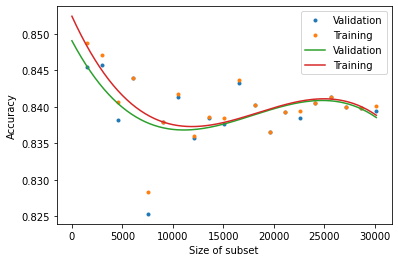

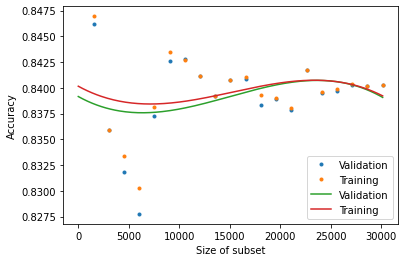

In [45]:
_, _ = growing_subsets(df, 20, model=DecisionTreeClassifier, max_depth=6758, min_samples_split=40, min_impurity_decrease=0.01)
_, _ = growing_subsets(df, 20, model=DecisionTreeClassifier, max_depth=6758, min_samples_split=142, min_impurity_decrease=0.01)
